In [1]:
import PIL
import numpy as np
import torch
from PIL import Image
from matplotlib import pyplot as plt
from torchvision.transforms import Compose, Resize, CenterCrop, Normalize, ToTensor
from einops import rearrange, repeat
from einops.layers.torch import Rearrange, Reduce

In [2]:
def plot_attention_maps(attn_maps, num_cols=4, main_title = 'Attention Maps'):
    """绘制一组注意力图

    Args:
        attn_maps (_type_): 注意力图列表
        num_cols (int, optional): 每列子图的数量. Defaults to 4.
        main_title (str, optional): 主标题. Defaults to 'Attention Maps'.
    """
    # 获取注意力图的数量
    num_attn_maps = len(attn_maps)
    
    # 计算需要多少行子图来展示所有的注意力图。
    # 使用向上取整的除法，确保即使最后一行不完整，也能分配足够的行数
    # Calculate the number of rows and columns for the subplots
    num_rows = (num_attn_maps + num_cols - 1) // num_cols

    # 创建一个图像和一个子图网格
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))

    # 设置整个图像的主标题和字体大小
    # Set the main title 
    fig.suptitle(main_title, fontsize=20)

    # Iterate over the attention maps and plot them in the subplots
    for i, attn_map in enumerate(attn_maps):
        row = i // num_cols
        col = i % num_cols

        if num_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]

        # 使用 viridis 颜色映射
        ax.imshow(attn_map, cmap='Greys')
        ax.set_title(f'Attention Map {i+1}')
        ax.axis('off')

    # 遍历剩余子图，隐藏未使用的子图
    # Hide any unused subplots
    for j in range(num_attn_maps, num_rows * num_cols):
        row = j // num_cols
        col = j % num_cols
        if num_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        ax.axis('off')

    # 调整子图之间的水平和垂直间距
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.3)

    # Show the figure
    plt.show()

(256, 256)
torch.Size([4, 4, 64, 64])
torch.Size([16, 64, 64])


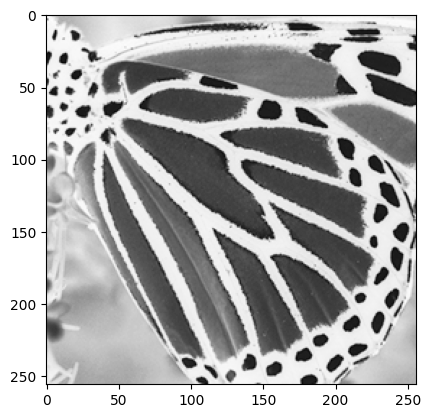

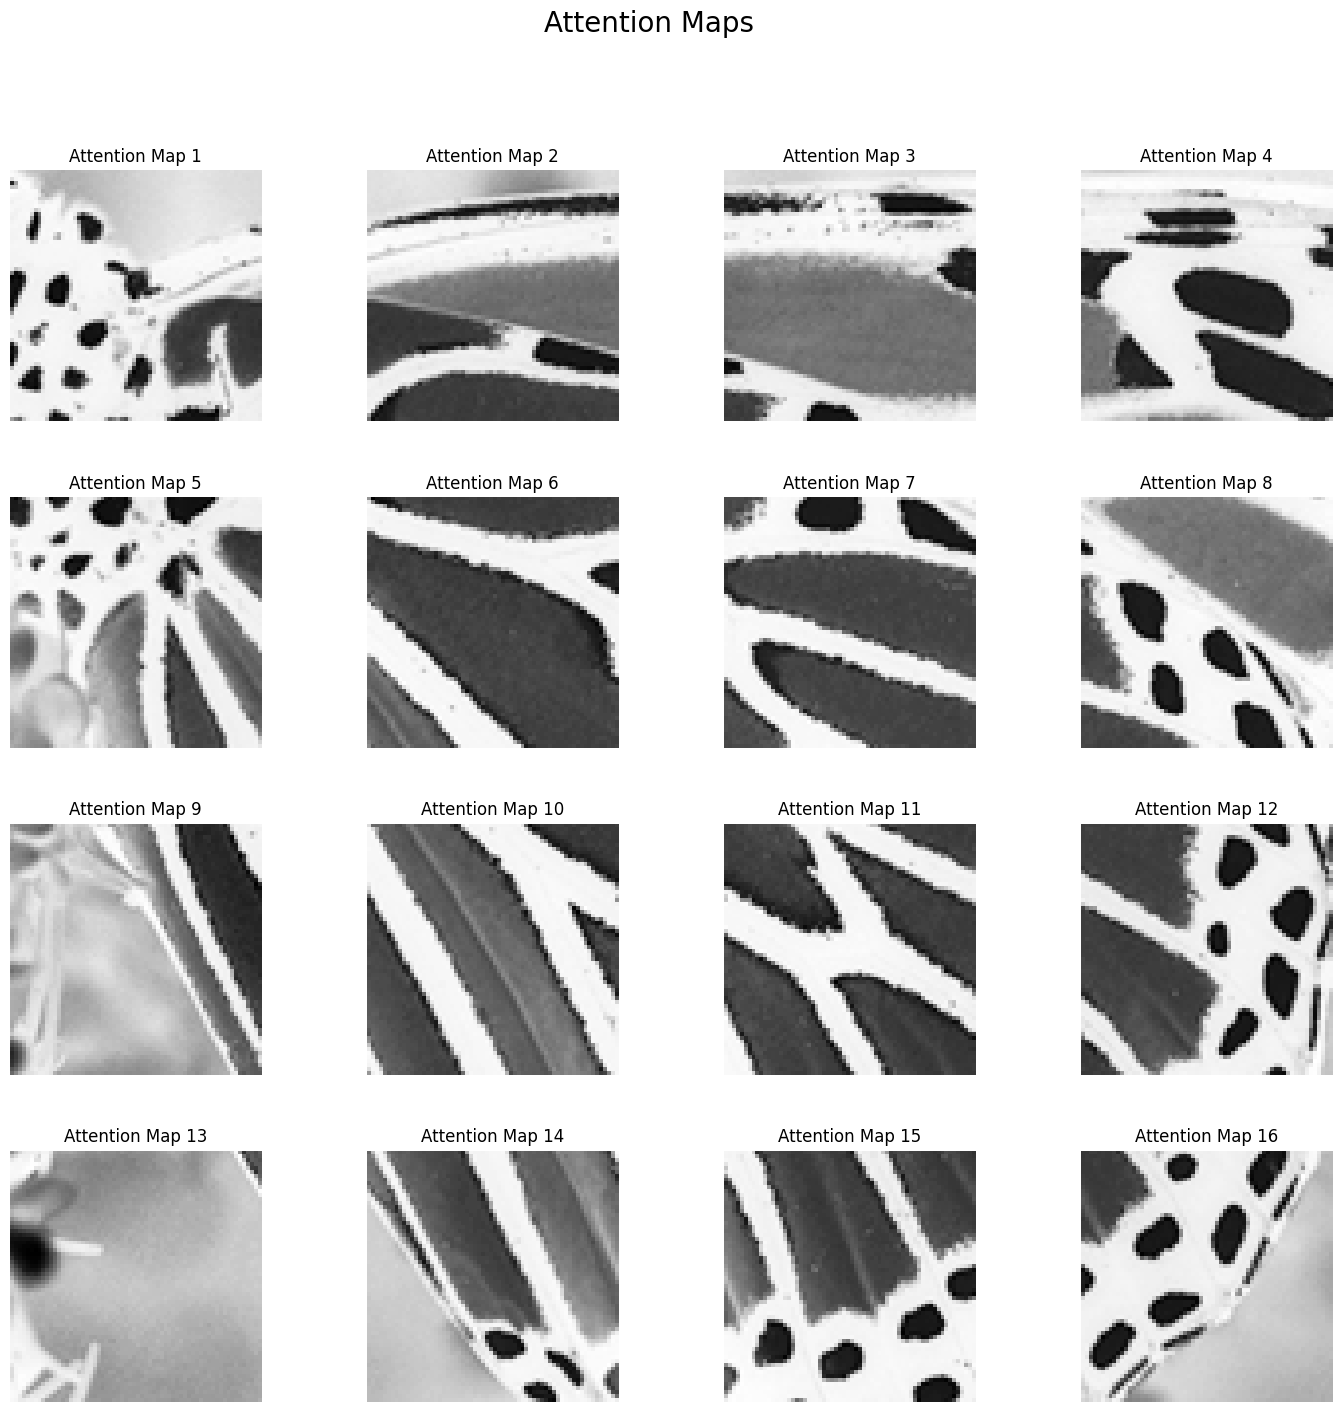

In [4]:
image = Image.open("../image/butterfly.png").convert('L')
image_np = np.array(image)
print(image_np.shape)
plt.imshow(image_np, cmap='Greys')
image_tr = torch.from_numpy(image_np)
image_tr = rearrange(image_tr, "(i Ph) (j Pw) -> i j Ph Pw", Ph=64, Pw=64)
print(image_tr.shape)
image_tr = rearrange(image_tr, "i j Ph Pw -> (i j) Ph Pw")
print(image_tr.shape)
image_np_list = [image_tr[i].numpy() for i in range(image_tr.size(0))]
plot_attention_maps(image_np_list)

(64, 64)
torch.Size([4, 4, 16, 16])
torch.Size([16, 16, 16])


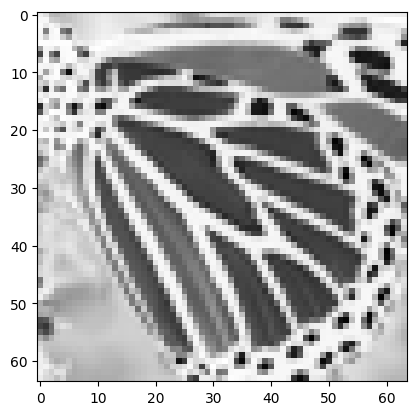

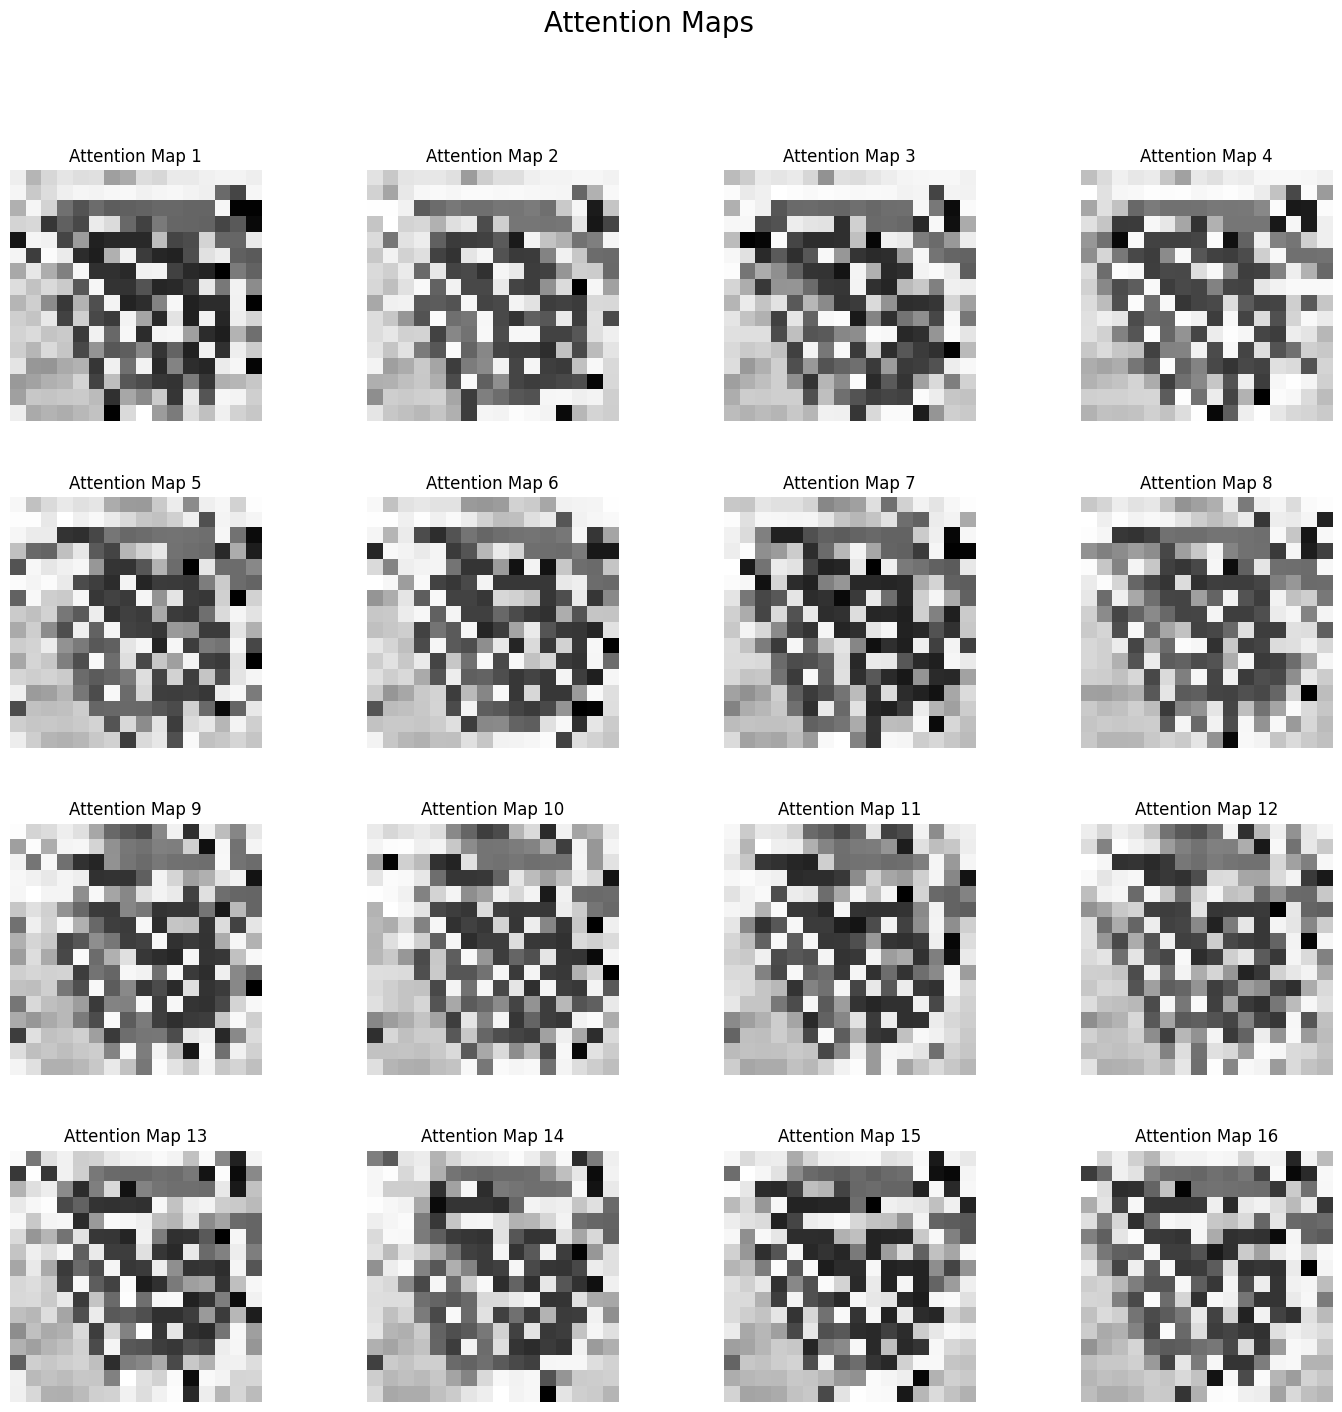

In [10]:
image = Image.open("../image/butterfly.png").convert('L')
image = image.resize((64, 64))
image_np = np.array(image)
print(image_np.shape)
plt.imshow(image_np, cmap='Greys')
image_tr = torch.from_numpy(image_np)
image_tr = rearrange(image_tr, "(Ph i) (Pw j) -> i j Ph Pw", Ph=16, Pw=16)
print(image_tr.shape)
image_tr = rearrange(image_tr, "i j Ph Pw -> (i j) Ph Pw")
print(image_tr.shape)
image_np_list = [image_tr[i].numpy() for i in range(image_tr.size(0))]
plot_attention_maps(image_np_list)